# Rome (Guido, Roma,Lazio) Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
# Read in Rome data source csv
guido_df = pd.read_csv('Resources/guido_roma_data.csv', delimiter=", ")
guido_df.head()

/Users/kathrynrigsby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,date,pm25,pm10,o3,no2,so2,co
0,2020/7/2,38.0,22.0,16.0,3.0,",",NaN
1,2020/7/3,38.0,19.0,19.0,1.0,",",NaN
2,2020/7/4,42.0,19.0,22.0,2.0,",",NaN
3,2020/7/5,34.0,13.0,30.0,1.0,"1,",NaN
4,2020/7/6,30.0,15.0,33.0,1.0,",",NaN


In [3]:
# Dropping columns not using
dropped_guido_df = guido_df.drop(["pm10","o3","no2","so2","co"],axis=1)
dropped_guido_df.head()

,date,pm25
0,2020/7/2,38.0
1,2020/7/3,38.0
2,2020/7/4,42.0
3,2020/7/5,34.0
4,2020/7/6,30.0


In [4]:
# Changing datatype from object to datetime
dropped_guido_df["date"] = pd.to_datetime(dropped_guido_df["date"])

In [5]:
# Dropping any data before 2017
droppedB4_17 = dropped_guido_df.loc[(dropped_guido_df["date"]>"2017-01-01")].dropna(how="any")

### 2017 Data

In [6]:
# Dropping all data except January - July 2017
rome_data_17 = droppedB4_17.loc[(droppedB4_17["date"]<"2017-07-25")].dropna(how='any')

In [7]:
# Create new AQI column
rome_data_17["AQI"]=""

In [8]:
# Calculate AQI
AQI2017 = []
for value in rome_data_17["pm25"]:
    if value >= 0 and value <= 12:
        AQI2017.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2017.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2017.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2017.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2017.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2017.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2017.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2017.append("invalid")
AQI2017 = [round(i,1) for i in AQI2017]

In [9]:
# Add caclulated AQI values to dataframe
rome_data_17["AQI"]=AQI2017
rome_data_17.head()

,date,pm25,AQI
986,2017-07-02,17.0,61.3
987,2017-07-03,21.0,69.7
988,2017-07-04,30.0,88.6
989,2017-07-05,30.0,88.6
990,2017-07-06,34.0,97.1


In [10]:
# Create bins and labels
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [11]:
# Use bins and labels to create quality of AQI
rome_data_17["Levels of Concern"] = pd.cut(rome_data_17["AQI"],bins,labels=quality,include_lowest=True)
rome_data_17

,date,pm25,AQI,Levels of Concern
986,2017-07-02,17.0,61.3,Moderate
987,2017-07-03,21.0,69.7,Moderate
988,2017-07-04,30.0,88.6,Moderate
989,2017-07-05,30.0,88.6,Moderate
990,2017-07-06,34.0,97.1,Moderate
...,...,...,...,...
1247,2017-03-29,33.0,95.0,Moderate
1248,2017-03-30,54.0,146.6,Unhealthy for Sensitive Groups
1249,2017-03-31,53.0,144.1,Unhealthy for Sensitive Groups
1250,2017-04-01,56.0,151.3,Unhealthy


In [12]:
# Export sorted Rome csv
rome_data_17.sort_values(by=["date"]).to_csv("output_data/wuhan_data_17.csv")

In [13]:
# Groupby date and calculate Mean,Max,Min
calculate_17 = rome_data_17.groupby(rome_data_17["date"].dt.strftime('%m'))
mean_df =calculate_17[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_17[["pm25","AQI"]].max()
min_df = calculate_17[["pm25","AQI"]].min()

In [14]:
# Merge mean_df,max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [15]:
# Merge result,min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [16]:
# Rename columns
rome_2017_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                    
 })
rome_2017_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,56.000000,129.558621,147.0,198.2,13.0,52.9
1,02,48.964286,123.735714,87.0,167.2,21.0,69.7
2,03,40.548387,113.419355,65.0,155.9,13.0,52.9
3,04,43.666667,121.213333,58.0,152.3,25.0,78.1
4,05,32.967742,96.377419,50.0,136.7,17.0,61.3
5,06,45.400000,124.826667,59.0,152.8,30.0,88.6
6,07,41.782609,116.178261,63.0,154.9,17.0,61.3


In [17]:
# Dropping columns no longer using
rome_2017_df = rome_2017_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### 2018 Data

In [18]:
# Drop all except January - July of 2018
rome_data_18 = droppedB4_17.loc[(droppedB4_17["date"]>"2017-12-31")&(droppedB4_17["date"]<"2018-07-25")].dropna(how='any')

In [19]:
# Calculate AQI
AQI2018 = []
for value in rome_data_18["pm25"]:
    if value >= 0 and value <= 12:
        AQI2018.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2018.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2018.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2018.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2018.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2018.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2018.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2018.append("invalid")
AQI2018 = [round(i,1) for i in AQI2018]

# Add calculated AQI values to new AQI column
rome_data_18["AQI"] = AQI2018
rome_data_18.head()

,date,pm25,AQI
627,2018-07-02,46.0,126.9
628,2018-07-03,46.0,126.9
629,2018-07-04,55.0,149.0
630,2018-07-05,63.0,154.9
631,2018-07-06,72.0,159.5


In [20]:
# Create bins and labels
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [21]:
# Use bins and labels to create quality of AQI
rome_data_18["Levels of Concern"] = pd.cut(rome_data_18["AQI"],bins,labels=quality,include_lowest=True)
rome_data_18

,date,pm25,AQI,Levels of Concern
627,2018-07-02,46.0,126.9,Unhealthy for Sensitive Groups
628,2018-07-03,46.0,126.9,Unhealthy for Sensitive Groups
629,2018-07-04,55.0,149.0,Unhealthy for Sensitive Groups
630,2018-07-05,63.0,154.9,Unhealthy
631,2018-07-06,72.0,159.5,Unhealthy
...,...,...,...,...
894,2018-03-29,46.0,126.9,Unhealthy for Sensitive Groups
895,2018-03-30,21.0,69.7,Moderate
896,2018-03-31,30.0,88.6,Moderate
897,2018-04-01,21.0,69.7,Moderate


In [22]:
# Export sorted Rome data to csv
rome_data_18.sort_values(by=["date"]).to_csv("output_data/rome_data_18.csv")

In [23]:
# Groupby date and calculate Mean,Max,Min
calculate_18 = rome_data_18.groupby(rome_data_18["date"].dt.strftime('%m'))
mean_df =calculate_18[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_18[["pm25","AQI"]].max()
min_df = calculate_18[["pm25","AQI"]].min()

In [24]:
# Merge mean_df,max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [25]:
# Merge result,min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [26]:
# Rename columns
rome_2018_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
 })
rome_2018_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,48.580645,121.758065,87.0,167.2,17.0,61.3
1,02,45.250000,118.864286,87.0,167.2,25.0,78.1
2,03,35.451613,100.219355,72.0,159.5,13.0,52.9
3,04,45.866667,124.256667,72.0,159.5,21.0,69.7
4,05,38.290323,107.000000,76.0,161.6,17.0,61.3
5,06,38.357143,108.360714,53.0,144.1,25.0,78.1
6,07,49.333333,131.733333,72.0,159.5,34.0,97.1


In [27]:
# Dropping columns no longer using
rome_data18_df = rome_2018_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### 2019 Data

In [28]:
# Drop all except January - July from 2019
guido_data_19 = droppedB4_17.loc[(droppedB4_17["date"]>"2018-12-31")&(droppedB4_17["date"]<"2019-07-25")].dropna(how='any')

In [29]:
# Create new AQI column
guido_data_19["AQI"]=""

In [30]:
# Calculate AQI
AQI2019 = []
for value in guido_data_19["pm25"]:
    if value >= 0 and value <= 12:
        AQI2019.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2019.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2019.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2019.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2019.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2019.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2019.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2019.append("invalid")
AQI2019 = [round(i,1) for i in AQI2019]

In [31]:
# Add newly calculated values to dataframe
guido_data_19["AQI"] = AQI2019
guido_data_19.head()

,date,pm25,AQI
279,2019-07-02,50.0,136.7
280,2019-07-03,53.0,144.1
281,2019-07-04,53.0,144.1
282,2019-07-05,55.0,149.0
283,2019-07-06,59.0,152.8


In [32]:
# Create bins and labels
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [33]:
# Use bins and labels to create quality of AQI
guido_data_19["Levels of Concern"] = pd.cut(guido_data_19["AQI"],bins,labels=quality,include_lowest=True)
guido_data_19

,date,pm25,AQI,Levels of Concern
279,2019-07-02,50.0,136.7,Unhealthy for Sensitive Groups
280,2019-07-03,53.0,144.1,Unhealthy for Sensitive Groups
281,2019-07-04,53.0,144.1,Unhealthy for Sensitive Groups
282,2019-07-05,55.0,149.0,Unhealthy for Sensitive Groups
283,2019-07-06,59.0,152.8,Unhealthy
...,...,...,...,...
534,2019-03-28,34.0,97.1,Moderate
535,2019-03-29,38.0,107.2,Unhealthy for Sensitive Groups
536,2019-03-30,46.0,126.9,Unhealthy for Sensitive Groups
537,2019-03-31,42.0,117.0,Unhealthy for Sensitive Groups


In [34]:
# Export sorted Rome data to csv
guido_data_19.sort_values(by=["date"]).to_csv("output_data/guido_data_19.csv")

In [35]:
# Groupby date and calculate Mean,Max,Min
calculate_19 = guido_data_19.groupby(guido_data_19["date"].dt.strftime('%m'))
mean_df =calculate_19[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_19[["pm25","AQI"]].max()
min_df = calculate_19[["pm25","AQI"]].min()

In [36]:
# Merge mean_df,max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [37]:
# Merge result,min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [38]:
# Rename columns
guido_2019_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI", 
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                 
 })
guido_2019_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,46.551724,121.320690,91.0,169.3,21.0,69.7
1,02,52.259259,125.414815,95.0,171.4,13.0,52.9
2,03,44.655172,122.224138,68.0,157.4,25.0,78.1
3,04,46.137931,121.093103,82.0,164.7,17.0,61.3
4,05,27.935484,84.764516,46.0,126.9,13.0,52.9
5,06,54.100000,141.433333,78.0,162.6,25.0,78.1
6,07,48.375000,130.854167,63.0,154.9,34.0,97.1


In [39]:
# Dropping columns no longer using
rome_data19_df = guido_2019_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### 2020 Data

In [40]:
# Drop all data except January - July of 2020
guido_data_20 = droppedB4_17.loc[(droppedB4_17["date"]>"2019-12-31")&(droppedB4_17["date"]<"2020-07-25")].dropna(how='any')

In [41]:
# Create new AQI column
guido_data_20["AQI"]=""

In [42]:
# Calculate AQI
AQI2020 = []
for value in guido_data_20["pm25"]:
    if value >= 0 and value <= 12:
        AQI2020.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2020.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2020.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2020.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2020.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2020.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2020.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2020.append("invalid")
AQI2020 = [round(i,1) for i in AQI2020]

In [43]:
# Add newly calculated AQI values to dataframe
guido_data_20["AQI"] = AQI2020
guido_data_20.head()

,date,pm25,AQI
0,2020-07-02,38.0,107.2
1,2020-07-03,38.0,107.2
2,2020-07-04,42.0,117.0
3,2020-07-05,34.0,97.1
4,2020-07-06,30.0,88.6


In [44]:
# Create bins and labels
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [45]:
# Use bins and labels to create quality of AQI
guido_data_20["Levels of Concern"] = pd.cut(guido_data_20["AQI"],bins,labels=quality,include_lowest=True)
guido_data_20

,date,pm25,AQI,Levels of Concern
0,2020-07-02,38.0,107.2,Unhealthy for Sensitive Groups
1,2020-07-03,38.0,107.2,Unhealthy for Sensitive Groups
2,2020-07-04,42.0,117.0,Unhealthy for Sensitive Groups
3,2020-07-05,34.0,97.1,Moderate
4,2020-07-06,30.0,88.6,Moderate
...,...,...,...,...
190,2020-01-28,59.0,152.8,Unhealthy
191,2020-01-29,25.0,78.1,Moderate
192,2020-01-30,34.0,97.1,Moderate
193,2020-01-31,38.0,107.2,Unhealthy for Sensitive Groups


In [46]:
# Export sorted Rome data to csv
guido_data_20.sort_values(by=["date"]).to_csv("output_data/guido_data_20.csv")

In [47]:
# Groupby date and calculate Mean,Max,Min
calculate_20 = guido_data_20.groupby(guido_data_20["date"].dt.strftime('%m'))
mean_df =calculate_20[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_20[["pm25","AQI"]].max()
min_df = calculate_20[["pm25","AQI"]].min()

In [48]:
# Merge mean_df,max_df
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [49]:
# Merge result,min_df
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [50]:
# Rename columns
guido_2020_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                  
 })
guido_2020_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,66.666667,146.510000,97.0,172.4,25.0,78.1
1,02,50.307692,130.800000,82.0,164.7,17.0,61.3
2,03,47.400000,120.946667,85.0,166.2,17.0,61.3
3,04,49.500000,127.053846,78.0,162.6,17.0,61.3
4,05,38.433333,107.833333,61.0,153.8,21.0,69.7
5,06,30.000000,89.063333,42.0,117.0,21.0,69.7
6,07,34.391304,97.534783,76.0,161.6,9.0,37.5


In [51]:
# Dropping columns no longer using
rome_data20_df  = guido_2020_month_df.drop(['Avg pm2.5', 'Max pm2.5','Max AQI','Min pm2.5','Min AQI'], axis=1)

### Merging the Data

In [52]:
# Merge rome_2017_df,rome_2018_df
monthly1 = pd.merge(rome_2017_df,rome_data18_df, how="outer", on=["Month"],suffixes=("_17","_18"))

In [53]:
# Merge monthly1, rome_data19_df
monthly2 = pd.merge(monthly1,rome_data19_df, how="outer",on=["Month"])
monthly2

,Month,Avg AQI_17,Avg AQI_18,Avg AQI
0,01,129.558621,121.758065,121.320690
1,02,123.735714,118.864286,125.414815
2,03,113.419355,100.219355,122.224138
3,04,121.213333,124.256667,121.093103
4,05,96.377419,107.000000,84.764516
5,06,124.826667,108.360714,141.433333
6,07,116.178261,131.733333,130.854167


In [54]:
# Rename columns
merging_data = monthly2.rename(columns={
                                        "Avg AQI":"Avg AQI_19"
                                       
                                        })

In [55]:
# Merge merging_data,rome_data20_df
monthly3 = pd.merge(merging_data,rome_data20_df,how='outer',on=["Month"])

In [56]:
# Rename columns
rome_summary_df = monthly3.rename(columns={
                                       "Avg AQI":"Avg AQI_20" 
                                       
                                        })
rome_summary_df

,Month,Avg AQI_17,Avg AQI_18,Avg AQI_19,Avg AQI_20
0,01,129.558621,121.758065,121.320690,146.510000
1,02,123.735714,118.864286,125.414815,130.800000
2,03,113.419355,100.219355,122.224138,120.946667
3,04,121.213333,124.256667,121.093103,127.053846
4,05,96.377419,107.000000,84.764516,107.833333
5,06,124.826667,108.360714,141.433333,89.063333
6,07,116.178261,131.733333,130.854167,97.534783


In [57]:
# Export Rome data to csv
rome_summary_df.to_csv("output_data/rome_summary_data.csv",index=False)

### Plotting the Data

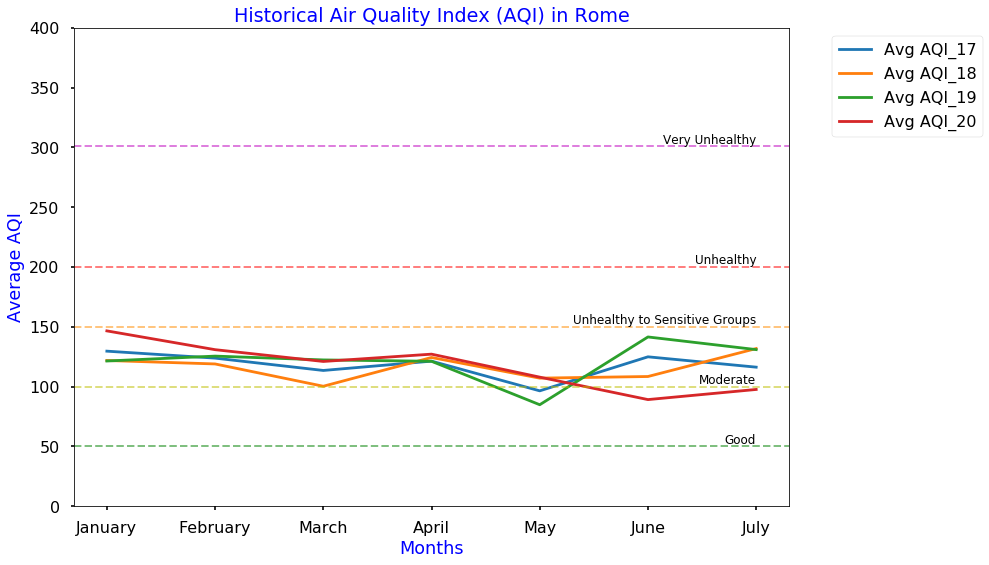

In [59]:
plt.style.use('seaborn-poster')
rome_summary_df.plot(y=["Avg AQI_17","Avg AQI_18","Avg AQI_19","Avg AQI_20"])
plt.title("Average AQI", color="blue")
plt.xlabel("Months",color="blue")
plt.ylabel("AQI",color="blue")
plt.xticks(np.arange(7),("January","February","March","April","May","June","July"))


plt.axhline(y=301,color='m', alpha=.5, linestyle='--', lw=2)
plt.text(6,301,'Very Unhealthy', ha='right', va='bottom', fontsize=12)
plt.axhline(y=200,color='r', alpha=.5, linestyle='--', lw=2)
plt.text(6,200,'Unhealthy', ha='right', va='bottom', fontsize=12)
plt.axhline(y=150,color='darkorange', alpha=.5, linestyle='--', lw=2)
plt.text(6,150,'Unhealthy to Sensitive Groups', ha='right', va='bottom', fontsize=12)
plt.axhline(y=100,color='y', alpha=.5, linestyle='--', lw=2)
plt.text(6,100,'Moderate', ha='right', va='bottom', fontsize=12)
plt.axhline(y=50,color='g', alpha=.5, linestyle='--', lw=2)
plt.text(6,50,'Good', ha='right', va='bottom', fontsize=12)
plt.ylim(0,400)
plt.title("Historical Air Quality Index (AQI) in Rome")
plt.legend(loc=9, bbox_to_anchor=(.5,.9),ncol=4)
#plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.ylabel("Average AQI")

plt.savefig("output_data/rome_plot.png")
plt.show()

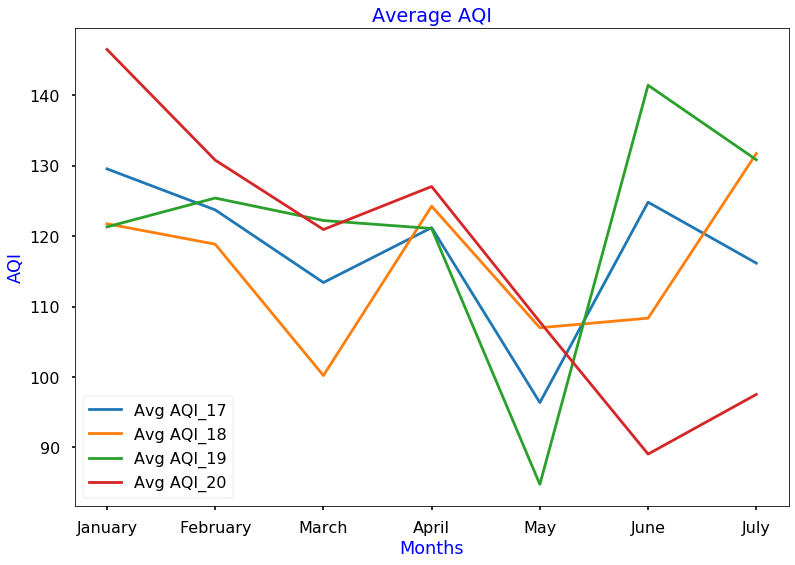

In [60]:
plt.style.use('seaborn-poster')
rome_summary_df.plot(y=["Avg AQI_17","Avg AQI_18","Avg AQI_19","Avg AQI_20"])
plt.title("Average AQI", color="blue")
plt.xlabel("Months",color="blue")
plt.ylabel("AQI",color="blue")
plt.xticks(np.arange(7),("January","February","March","April","May","June","July"))
plt.savefig("output_data/rome_plot2.png")
plt.show()

### Shutdown Policy

* February 20: Covid-19 cases began to appear
* February 24: Officials began closing schools, museums, theatres, religious and sporting events,however, cafes 
    and bars were allowed to stay open until 6 p.m.
* March 8: Haven been persuaded, the Italian government imposed a lockdown in most of the north
* March 10: Prime minister restricted movement across all of Italy
* March 12: Starting March 12, restaurants and shops were finally ordered to shut down
* April 3: Entire country shutdown
* Mid June: Because Italy was able to flatten the curve and bring cases significantly down, Italy began to open back up


### Cases
*Case count taken at 2:00 a.m. this morning from Johns Hopkins website (https://coronavirus.jhu.edu/map.html)

#### Country

* Deaths: 35,129
* Confirmed Cases: 246,776

#### Rome (whole region of Lazio)
* Deaths: 862
* Confirmed Cases: 8,611